<a href="https://colab.research.google.com/github/michalhal92/coffee-store-sales/blob/main/python/3_Pog%C5%82%C4%99biona_analiza_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biblioteki

In [ ]:
# wczytanie bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Segmentacja klientów

In [ ]:
# Wczytanie danych, podgląd przykładowych danych
clv = pd.read_csv('/content/sample_data/wartosc i lojalnosc klienta rfm avg csv.csv')
df_clv = pd.DataFrame(clv)
df_clv.head()

,card,customer_type,R_recency_days_since_last_purchase,F_total_orders,M_lifetime_value,avg_products_per_order_per_customer,avg_order_value_per_customer
0,ANON-0000-0000-0012,CARD,62,88,6380.08,1.682171,49.457984
1,ANON-0000-0000-0141,CARD,50,90,3728.42,1.351852,34.522407
2,ANON-0000-0000-1163,CARD,2,56,3638.98,1.597403,47.259481
3,ANON-0000-0000-0276,CARD,52,59,2837.66,1.318841,41.125507
4,ANON-0000-0000-0507,CARD,2,38,2792.70,1.549020,54.758824


In [ ]:
# Objętność tabeli

df_clv.shape

(342, 7)

In [ ]:
# Nulle
df_clv.isnull().sum()

,0
card,0
customer_type,0
R_recency_days_since_last_purchase,0
F_total_orders,0
M_lifetime_value,0
avg_products_per_order_per_customer,0
avg_order_value_per_customer,0


In [ ]:
df_clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   card                                 342 non-null    object 
 1   customer_type                        342 non-null    object 
 2   R_recency_days_since_last_purchase   342 non-null    int64  
 3   F_total_orders                       342 non-null    int64  
 4   M_lifetime_value                     342 non-null    float64
 5   avg_products_per_order_per_customer  342 non-null    float64
 6   avg_order_value_per_customer         342 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 18.8+ KB


In [ ]:
df_clv.describe()

,R_recency_days_since_last_purchase,F_total_orders,M_lifetime_value,avg_products_per_order_per_customer,avg_order_value_per_customer,R_Score,F_Score,M_Score
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,127.014620,5.654971,297.819766,1.273154,41.095794,2.371345,1.578947,2.450292
std,99.105041,9.796356,558.237701,0.389626,13.774065,1.125340,0.805714,1.144482
min,0.000000,2.000000,42.120000,1.000000,21.060000,1.000000,1.000000,1.000000
25%,34.000000,2.000000,71.520000,1.000000,31.316591,1.000000,1.000000,1.000000
50%,119.000000,3.000000,144.020000,1.000000,35.760000,2.000000,1.000000,2.500000
75%,191.000000,5.000000,286.080000,1.548128,50.045380,3.000000,2.000000,3.000000
max,383.000000,90.000000,6380.080000,2.600000,93.075000,4.000000,3.000000,4.000000


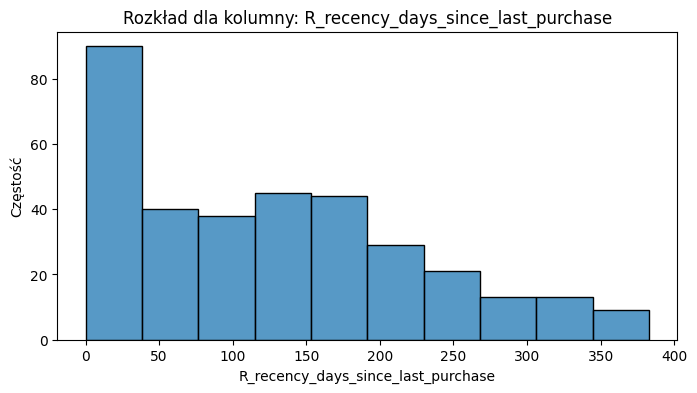

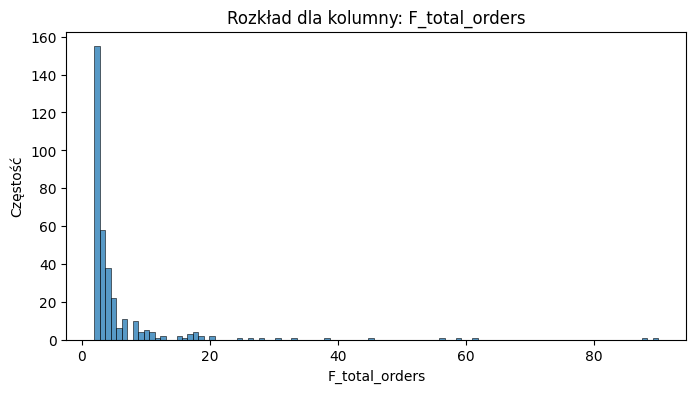

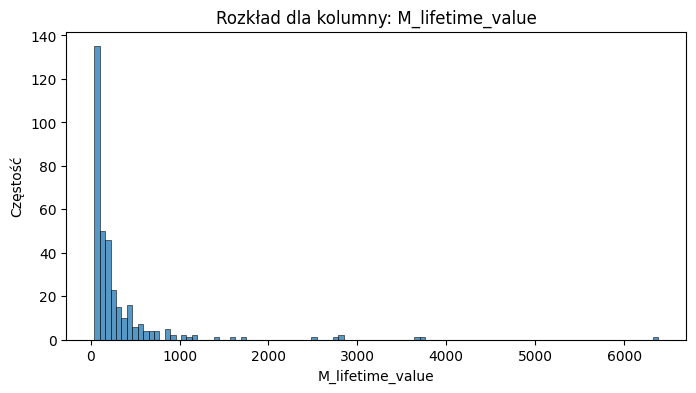

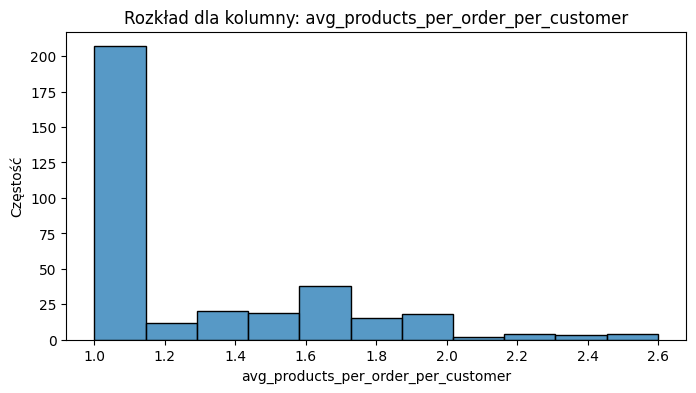

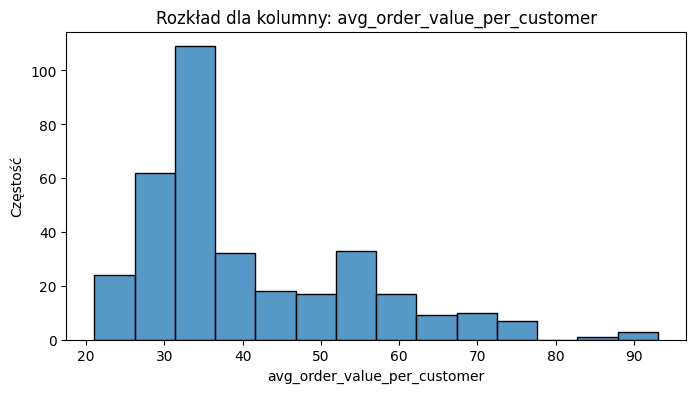

In [ ]:
# rozkład danych, standardowe histogramy, skala liniowa

# Wybór kolumn numerycznych
numerical_cols = df_clv.select_dtypes(include=['float64', 'int64']).columns

# Histogram dla każdej kolumny
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clv[col], kde=False)
    plt.title(f'Rozkład dla kolumny: {col}')
    plt.xlabel(col)
    plt.ylabel('Częstość')
    plt.show()

dla R warto zmodyfikować skalę dla lepszego zwyzualizowania kontekstu biznesowego, dla F i M wykres jest mało czytelny warto przeskalować logarytmicznie

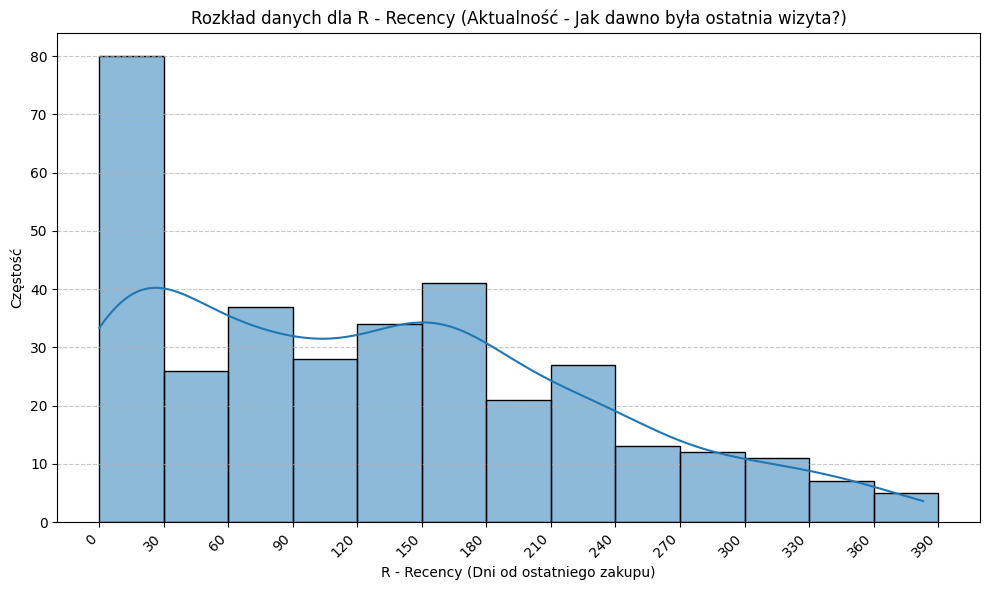

In [ ]:
# histogram R - zoptymalizowany: skala co 30 dni dla zobrazowania kontekstu biznesowego

# Ustalenie maksymalnej liczby dni od ostatniego zakupu
max_R = df_clv['R_recency_days_since_last_purchase'].max()

# Definicja binów co 30 dni
bins_30_R = np.arange(0, max_R + 30, 30)

# Stworzenie histogramu
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df_clv,
    x='R_recency_days_since_last_purchase',
    bins=bins_30_R,
    kde=True,  # Wypłaszczenie dla uwidocznienia rozkładu
    edgecolor='black'
)

# Ustawienie etykiet na osi X
plt.xticks(
    ticks=bins_30_R,
    rotation=45,
    ha='right'
)

plt.title('Rozkład danych dla R - Recency (Aktualność - Jak dawno była ostatnia wizyta?)')
plt.xlabel('R - Recency (Dni od ostatniego zakupu)')
plt.ylabel('Częstość')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



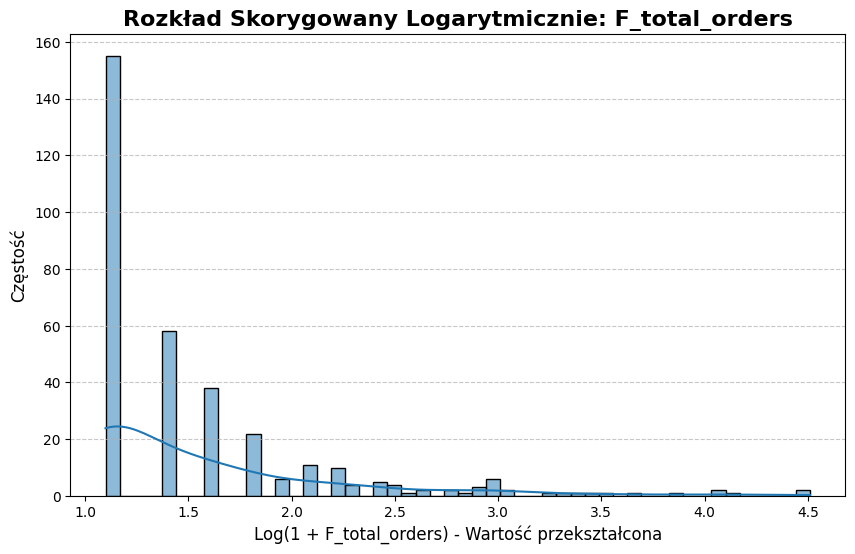

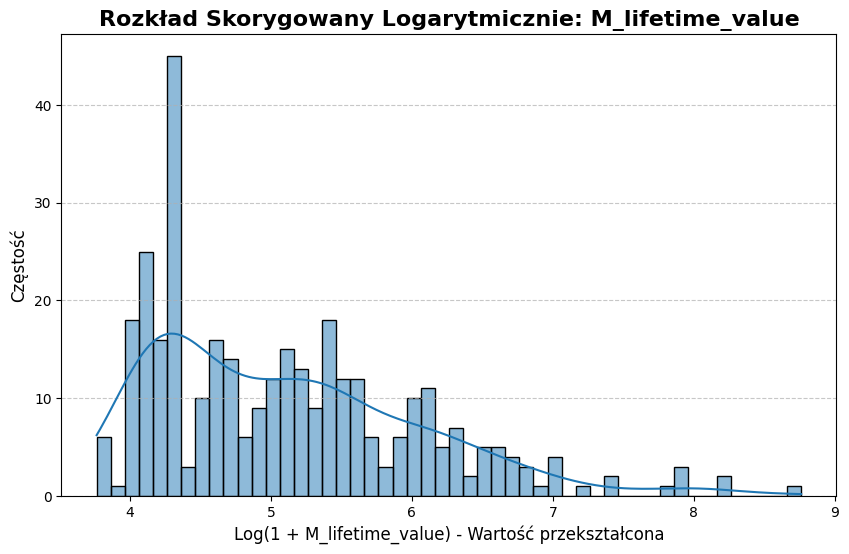

In [ ]:
# # histogram F, M - optymalizacja: stosuję transformację logarytmiczną dla lepszego skupienia
FM_COLS = ['F_total_orders', 'M_lifetime_value']

for col in FM_COLS:
    # 1. Przekształcenie Log(1+x): bezpieczne i redukujące asymetrię
    data_log = np.log1p(df_clv[col])

    plt.figure(figsize=(10, 6))

    # Używamy histogramu z KDE dla lepszej wizualizacji kształtu rozkładu
    ax = sns.histplot(
        data_log,
        kde=True,
        bins=50,
        edgecolor='black'
    )

    # 2. Etykietowanie i komunikacja celu transformacji
    plt.title(f'Rozkład Skorygowany Logarytmicznie: {col}', fontsize=16, fontweight='bold')
    # Oś X pokazuje, że wartości zostały przekształcone.
    plt.xlabel(f'Log(1 + {col}) - Wartość przekształcona', fontsize=12)
    plt.ylabel('Częstość', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

In [ ]:
# Tworzenie segmentów RFM

# --- 1. R: RECENCY (RĘCZNE BINY) ---
# Ustalony próg biznesowy: 30, 90, 180 dni.
bins_R = [0, 30, 90, 180, df_clv['R_recency_days_since_last_purchase'].max() + 1]
labels_R = [4, 3, 2, 1] # 4 = Najnowszy

df_clv['R_Score'] = pd.cut(
    df_clv['R_recency_days_since_last_purchase'],
    bins=bins_R,
    labels=labels_R,
    include_lowest=True,
    right=False
).astype(int)

# --- 2. F: FREQUENCY (KWARTYLE) ---
# q=4 dla 4 binów. labels=False i +1 daje rangi 1-4.
df_clv['F_Score'] = pd.qcut(
    df_clv['F_total_orders'],
    q=4,
    labels=False,
    duplicates='drop' # Eliminacja błędu zduplikowanych progów (wiele F=1 lub F=2)
) + 1

# --- 3. M: MONETARY (KWARTYLE) ---
# q=4 dla 4 binów.
df_clv['M_Score'] = pd.qcut(
    df_clv['M_lifetime_value'],
    q=4,
    labels=False,
    duplicates='drop' # Eliminacja błędu zduplikowanych progów
) + 1

# --- 4. TWORZENIE FINALNEGO SEGMENTU RFM ---
df_clv['RFM_Segment'] = (
    df_clv['R_Score'].astype(str) +
    df_clv['F_Score'].astype(str) +
    df_clv['M_Score'].astype(str)
)

print("✅ Pełna segmentacja RFM została zakończona. Dane są gotowe do analizy segmentacyjnej i eksportu.")

✅ Pełna segmentacja RFM została zakończona. Dane są gotowe do analizy segmentacyjnej i eksportu.


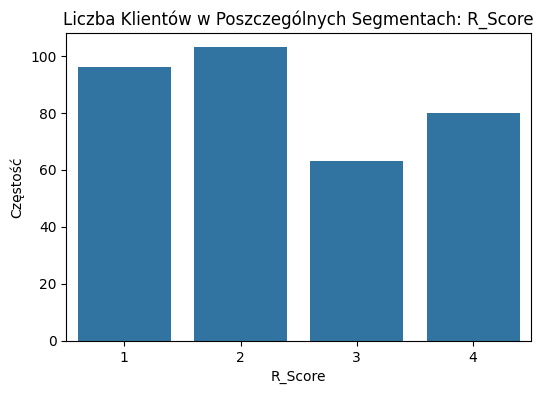

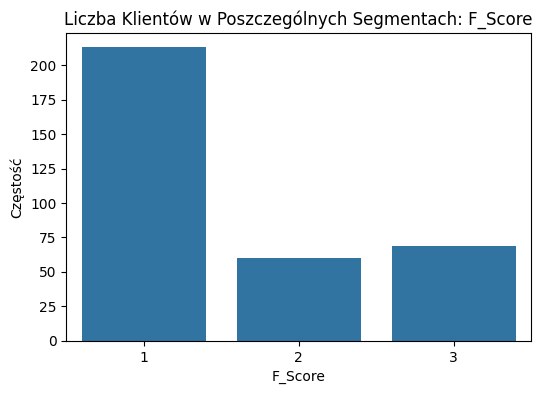

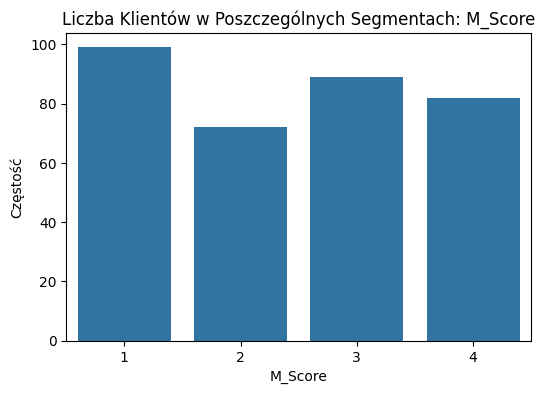

In [ ]:
# countploty r f m

# Wybór kolumn scoringowych
segments_RFM = ['R_Score', 'F_Score', 'M_Score']

# countploty
for col in segments_RFM:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_clv, x=col)
    plt.title(f'Liczba Klientów w Poszczególnych Segmentach: {col}')
    plt.xlabel(col)
    plt.ylabel('Częstość')
    plt.show()

In [ ]:
df_clv.head()

,card,customer_type,R_recency_days_since_last_purchase,F_total_orders,M_lifetime_value,avg_products_per_order_per_customer,avg_order_value_per_customer,R_Score,F_Score,M_Score,RFM_Segment
0,ANON-0000-0000-0012,CARD,62,88,6380.08,1.682171,49.457984,3,3,4,334
1,ANON-0000-0000-0141,CARD,50,90,3728.42,1.351852,34.522407,3,3,4,334
2,ANON-0000-0000-1163,CARD,2,56,3638.98,1.597403,47.259481,4,3,4,434
3,ANON-0000-0000-0276,CARD,52,59,2837.66,1.318841,41.125507,3,3,4,334
4,ANON-0000-0000-0507,CARD,2,38,2792.70,1.549020,54.758824,4,3,4,434


coś jest źle ze scoringiem F - brak występowania kategorii 4 to brak wyznaczenia klientów najczęstszych - do poprawy

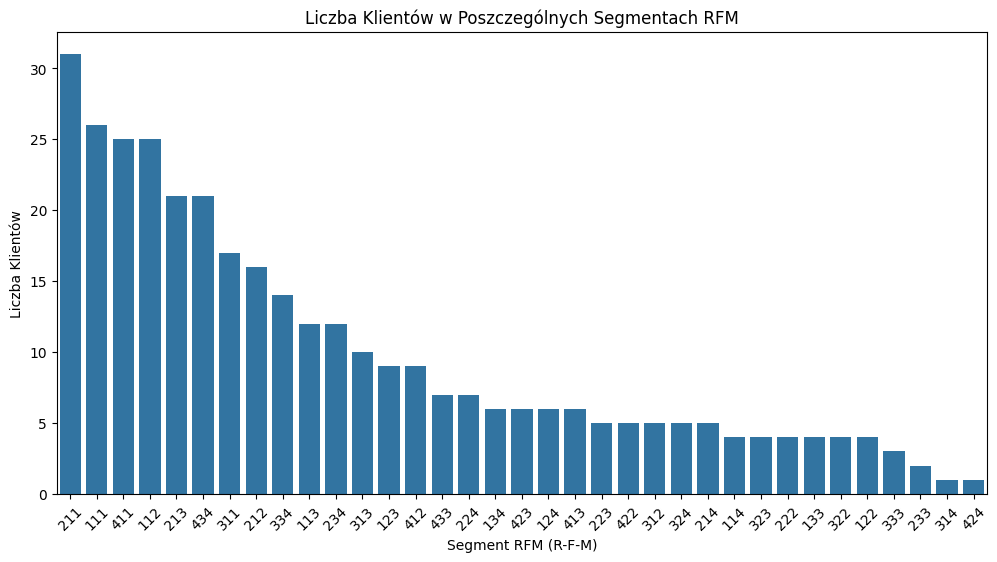

In [ ]:
# Zliczanie klientów w każdym segmencie RFM
rfm_counts = df_clv['RFM_Segment'].value_counts().reset_index()
rfm_counts.columns = ['RFM_Segment', 'Customer_Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='RFM_Segment', y='Customer_Count', data=rfm_counts)
plt.title('Liczba Klientów w Poszczególnych Segmentach RFM')
plt.xlabel('Segment RFM (R-F-M)')
plt.ylabel('Liczba Klientów')
plt.xticks(rotation=45)
plt.show()

Obserwacje:
- dominują klienci o niskiej częstotliwości (Top 5 to klienci o najmniejszej F, w większości o niskiej R i M)